<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/Dic01-02/ClasificadorNumeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('/content/drive/MyDrive/Data/DigitRecognition/train.csv')

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
labels = data.label

In [14]:
images = data.drop(['label'], axis = 1)
images = images.to_numpy()

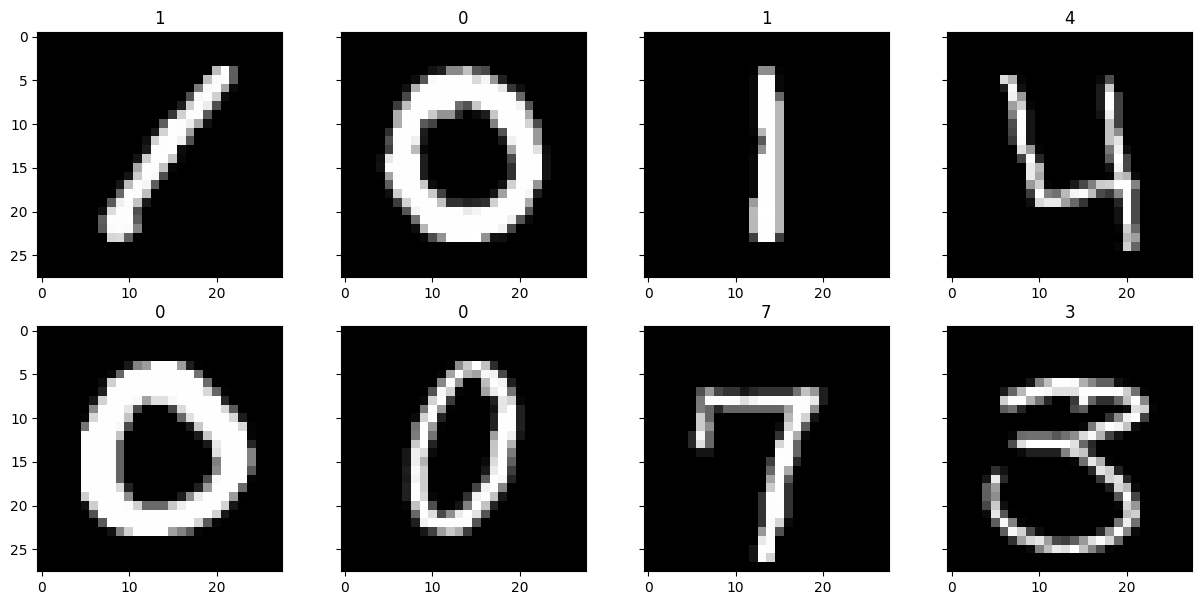

In [15]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize = (15, 7), sharey=True)

aux = 0

for i in range(8):
  if i < 4:
    image = images[i, :].reshape((28,28))
    ax[0][i].imshow(image, cmap = 'gray')
    ax[0][i].set_title(labels[i])
  else:
    image = images[i, :].reshape((28, 28))
    ax[1][i-4].imshow(image, cmap = 'gray')
    ax[1][i-4].set_title(labels[i])

In [16]:
#Vamos a normalizar los datos
images = images/255

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,labels, test_size=0.10, random_state=42)

In [18]:
def ones(Y):
  ones = np.zeros((Y.size, 10))
  ones[np.arange(Y.size), Y] = 1

  return ones

y_train = ones(y_train)
y_test = ones(y_test)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [163]:
tf.random.set_seed(1234)  # applied to achieve reproducible results
model = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(3, activation='relu', name = 'layer1'),
        Dense(10, activation='softmax')
     ]
)

In [164]:
model.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [165]:
history = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 6s 4ms/step - loss: 0.4469 - accuracy: 0.1014
Epoch 2/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.3356 - accuracy: 0.1007
Epoch 3/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.3264 - accuracy: 0.1558
Epoch 4/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.3176 - accuracy: 0.2072
Epoch 5/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.3089 - accuracy: 0.2083
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2993 - accuracy: 0.2287
Epoch 7/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.2871 - accuracy: 0.3199
Epoch 8/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2761 - accuracy: 0.4134
Epoch 9/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.2659 - accuracy: 0.4697
Epoch 10/10
1182/1182 [==============================] - 5s 5ms/step - loss: 0.256

In [166]:
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)

132/132 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.5186
0.2519896626472473 0.5185714364051819


El costo y el Accuracy para nuestros datos de entrenamiento es muy bajo.

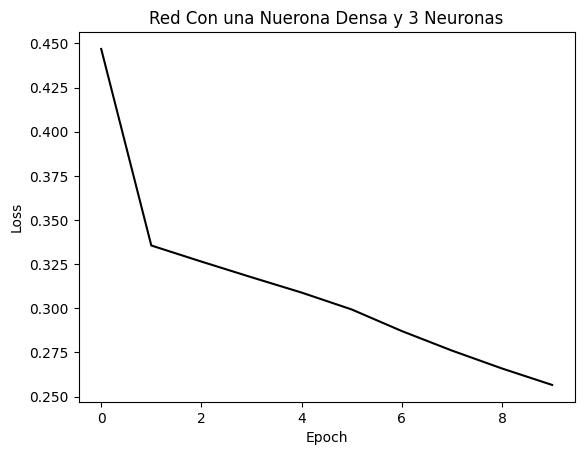

In [167]:
plt.plot(history.history['loss'], color = 'black')
plt.title('Red Con una Nuerona Densa y 3 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [171]:
tf.random.set_seed(1234)  # applied to achieve reproducible results
model1 = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(16, activation='relu', name = 'layer1'),
        Dense(16,activation='relu', name = 'layer2'),
        Dense(10, activation='softmax')
     ]
)
model1.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 7s 5ms/step - loss: 0.3595 - accuracy: 0.2388
Epoch 2/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2810 - accuracy: 0.4407
Epoch 3/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2380 - accuracy: 0.6206
Epoch 4/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.2023 - accuracy: 0.6975
Epoch 5/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1784 - accuracy: 0.7357
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1622 - accuracy: 0.7597
Epoch 7/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.1500 - accuracy: 0.7778
Epoch 8/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1404 - accuracy: 0.7919
Epoch 9/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1324 - accuracy: 0.8044
Epoch 10/10
1182/1182 [==============================] - 8s 6ms/step - loss: 0.125

In [188]:
cost, ac = model1.evaluate(x_test, y_test)

print('Cost: {}, Accuracy: {}'.format(cost, ac))

132/132 [==============================] - 1s 5ms/step - loss: 0.1178 - accuracy: 0.8264
Cost: 0.11778262257575989, Accuracy: 0.8264285922050476


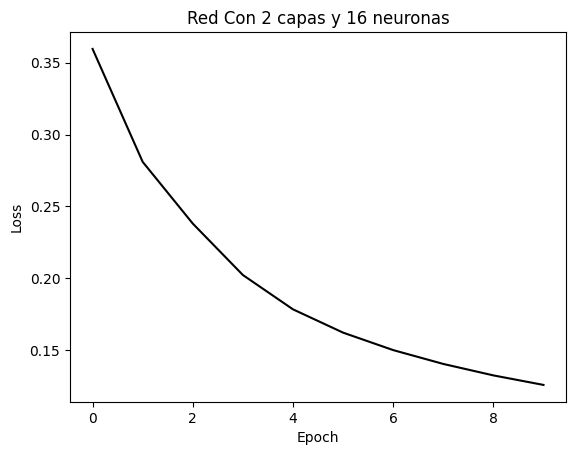

In [172]:
plt.plot(history1.history['loss'], color = 'black')
plt.title('Red Con 2 capas y 16 neuronas')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [175]:
tf.random.set_seed(1234)  # applied to achieve reproducible results
model2 = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(32, activation='relu', name = 'layer1'),
        Dense(16,activation='relu', name = 'layer2'),
        Dense(10, activation='softmax')
     ]
)
model2.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 15s 5ms/step - loss: 0.3704 - accuracy: 0.2440
Epoch 2/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2719 - accuracy: 0.4979
Epoch 3/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2221 - accuracy: 0.6706
Epoch 4/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.1837 - accuracy: 0.7568
Epoch 5/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1558 - accuracy: 0.7969
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1371 - accuracy: 0.8213
Epoch 7/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.1242 - accuracy: 0.8378
Epoch 8/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1144 - accuracy: 0.8502
Epoch 9/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1065 - accuracy: 0.8587
Epoch 10/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.10

In [189]:
cost, ac = model2.evaluate(x_test, y_test)

print('Cost: {}, Accuracy: {}'.format(cost, ac))

132/132 [==============================] - 1s 3ms/step - loss: 0.0977 - accuracy: 0.8657
Cost: 0.09765267372131348, Accuracy: 0.8657143115997314


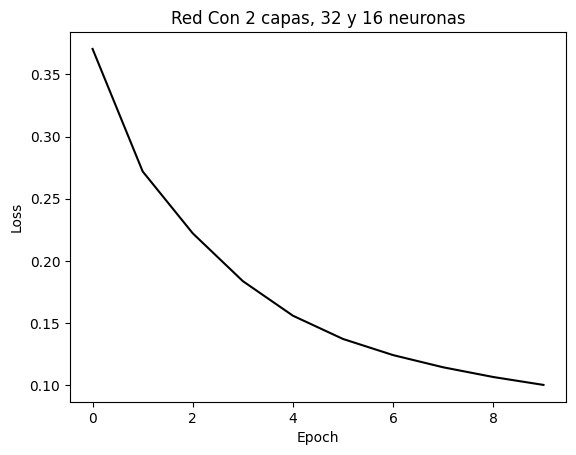

In [182]:
plt.plot(history2.history['loss'], color = 'black')
plt.title('Red Con 2 capas, 32 y 16 neuronas')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [191]:
tf.random.set_seed(1234)  # applied to achieve reproducible results
model3 = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(32, activation='relu', name = 'layer1'),
        Dense(32, activation='relu', name = 'layer2'),
        Dense(32, activation='relu', name = 'layer3'),
        Dense(10, activation='softmax')
     ]
)
model3.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 6s 4ms/step - loss: 0.3552 - accuracy: 0.2359
Epoch 2/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.2722 - accuracy: 0.5001
Epoch 3/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2187 - accuracy: 0.6393
Epoch 4/10
1182/1182 [==============================] - 5s 5ms/step - loss: 0.1766 - accuracy: 0.7196
Epoch 5/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.1485 - accuracy: 0.7718
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1297 - accuracy: 0.8067
Epoch 7/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1156 - accuracy: 0.8310
Epoch 8/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.1043 - accuracy: 0.8496
Epoch 9/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0955 - accuracy: 0.8631
Epoch 10/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.088

In [192]:
cost, ac = model3.evaluate(x_test, y_test)

print('Cost: {}, Accuracy: {}'.format(cost, ac))

132/132 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.8752
Cost: 0.08694296330213547, Accuracy: 0.8752381205558777


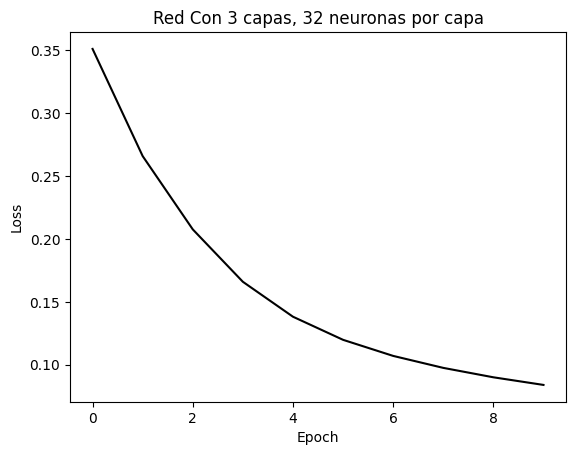

In [181]:
plt.plot(history3.history['loss'], color = 'black')
plt.title('Red Con 3 capas, 32 neuronas por capa')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [184]:
tf.random.set_seed(1234)  # applied to achieve reproducible results
model4 = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(128, activation='relu', name = 'layer1'),
        Dense(128, activation='relu', name = 'layer2'),
        Dense(10, activation='softmax')
     ]
)
model4.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 6s 4ms/step - loss: 0.3320 - accuracy: 0.4362
Epoch 2/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.2274 - accuracy: 0.7209
Epoch 3/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1685 - accuracy: 0.8010
Epoch 4/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1367 - accuracy: 0.8357
Epoch 5/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.1179 - accuracy: 0.8549
Epoch 6/10
1182/1182 [==============================] - 5s 5ms/step - loss: 0.1053 - accuracy: 0.8684
Epoch 7/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0963 - accuracy: 0.8767
Epoch 8/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0894 - accuracy: 0.8828
Epoch 9/10
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0840 - accuracy: 0.8890
Epoch 10/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.079

In [193]:
cost, ac = model4.evaluate(x_test, y_test)

print('Cost: {}, Accuracy: {}'.format(cost, ac))

132/132 [==============================] - 1s 5ms/step - loss: 0.0786 - accuracy: 0.8945
Cost: 0.07861197739839554, Accuracy: 0.8945237994194031


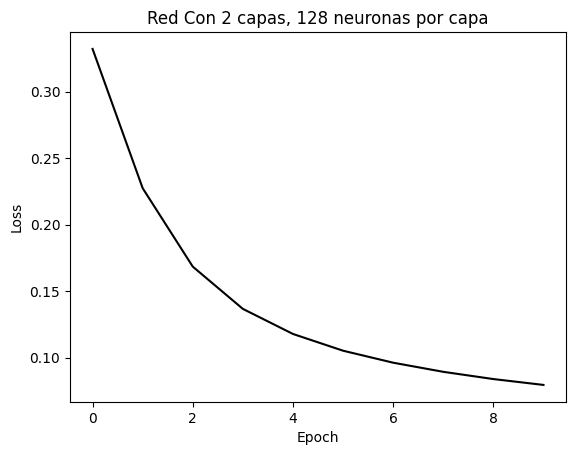

In [185]:
plt.plot(history4.history['loss'], color = 'black')
plt.title('Red Con 2 capas, 128 neuronas por capa')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Observamos Claramente, que para tener un mejor accuracy tenemos que agregar más neurona. Pero no necesariamente más capas. Esto hace que con menos hiperparametros, podamos entrenar un buen modelo de clasificación.